In [1]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

In [7]:
training_data = np.load('/content/drive/My Drive/training_dataset/training_data.npy')
print(training_data.shape)

categories = np.load('/content/drive/My Drive/training_dataset/categories.npy')
print(categories.shape)

valid_periods = np.load('/content/drive/My Drive/training_dataset/valid_periods.npy')
print(valid_periods.shape)

(48000, 2776)
(48000,)
(48000, 2)


(48000, 2)

Find out the shortest and longest interval in the time series.

In [8]:
min, max = (9999, -1), (0, -1)
for i, tuple in enumerate(valid_periods):
    diff = tuple[1] - tuple[0]
    if diff < min[0]: min = (diff, i)
    if diff > max[0]: max = (diff, i)

min, max

((24, 47852), (2776, 17143))

In [9]:
index_shortest = min[1]
index_longest = max[1]

(48000, 2776)

In [10]:
def extract_valid_data(training_data, filter=600):
    valid_data = []
    valid_categories = []
    valid_valid_periods = []
    for i in range(len(training_data)):
        start, end = valid_periods[i]
        if (end-start)<= filter:
            valid_data.append(training_data[i])
            valid_categories.append(categories[i])
            valid_valid_periods.append(valid_periods[i])
    return np.array(valid_data), np.array(valid_categories), np.array(valid_valid_periods)

In [11]:
training_data,categories,valid_periods  = extract_valid_data(training_data)

In [12]:
training_data_df = pd.DataFrame(training_data)
training_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47455 entries, 0 to 47454
Columns: 2776 entries, 0 to 2775
dtypes: float64(2776)
memory usage: 1005.1 MB


In [13]:
training_data_df = training_data_df.astype(np.float32)
training_data_df.info()
training_data_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47455 entries, 0 to 47454
Columns: 2776 entries, 0 to 2775
dtypes: float32(2776)
memory usage: 502.5 MB


,0,1,2,3,4,5,6,7,8,9,...,2766,2767,2768,2769,2770,2771,2772,2773,2774,2775
count,47455.0,47455.0,47455.0,47455.0,47455.0,47455.0,47455.0,47455.0,47455.0,47455.0,...,47455.000000,47455.000000,47455.000000,47455.000000,47455.000000,47455.000000,47455.000000,47455.000000,47455.000000,47455.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.513676,0.518206,0.526465,0.531334,0.528849,0.523800,0.520020,0.521301,0.528186,0.529958
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.288197,0.288838,0.287182,0.288181,0.289375,0.291487,0.295833,0.301804,0.303254,0.304478
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.259261,0.264566,0.274038,0.274937,0.268089,0.258154,0.245400,0.240333,0.245283,0.243144
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.526882,0.532698,0.544115,0.552775,0.549164,0.541008,0.538506,0.546512,0.558874,0.561410
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.771242,0.778266,0.785532,0.793103,0.792235,0.791300,0.792069,0.800000,0.807035,0.812885
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
sample_first = training_data_df.T[0]
sample_shortest = training_data_df.T[index_shortest]
sample_longest = training_data_df.T[index_longest]

KeyError: ignored

In [ ]:
import matplotlib.pyplot as plt

plt.plot(sample_first)
plt.title('First Sample')
plt.show()

plt.plot(sample_shortest)
plt.title('Shortest Sample')
plt.show()

plt.plot(sample_longest)
plt.title('Longest Sample')
plt.show()

In [ ]:
start_first, end_first = valid_periods[0]
sample_first_trimmed = sample_first[start_first:end_first]

plt.plot(sample_first_trimmed)
plt.title('First Sample')
plt.show()



start_shortest, end_shortest = valid_periods[index_shortest]
sample_shortest_trimmed = sample_shortest[start_shortest:end_shortest]

plt.plot(sample_shortest_trimmed)
plt.title('Shortest Sample')
plt.show()



start_longest, end_longest = valid_periods[index_longest]
sample_longest_trimmed = sample_longest[start_longest:end_longest]

plt.plot(sample_longest_trimmed)
plt.title('Longest Sample')
plt.show()


In [ ]:
category_counts = np.unique(categories, return_counts=True)
for category, count in zip(category_counts[0], category_counts[1]):
    print(f"Category {category}: {count}")

Category A: 5647
Category B: 10913
Category C: 9834
Category D: 9860
Category E: 10931
Category F: 270


In [15]:
lengths = valid_periods[:, 1] - valid_periods[:, 0]

intervals = [(0, 300), (301, 600), (601, 900), (901, 1200), (1201, 1500),
             (1501, 1800), (1801, 2100), (2101, 2400), (2401, 2776)]

interval_counts = {category: {interval: 0 for interval in intervals} for category in 'ABCDEF'}

for category, length in zip(categories, lengths):
    for interval in intervals:
        if interval[0] <= length < interval[1]:
            interval_counts[category][interval] += 1
            break

interval_counts_df = pd.DataFrame(interval_counts)

interval_ranges = [f"{start}-{end}" for start, end in intervals]
interval_counts_df.index = interval_ranges

interval_counts_df

,A,B,C,D,E,F
0-300,4276,10145,8527,7712,10320,230
301-600,1368,722,1235,2094,571,40
601-900,0,0,0,0,0,0
901-1200,0,0,0,0,0,0
1201-1500,0,0,0,0,0,0
1501-1800,0,0,0,0,0,0
1801-2100,0,0,0,0,0,0
2101-2400,0,0,0,0,0,0
2401-2776,0,0,0,0,0,0


In [16]:
# Plot 10 time series for each category
fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(12, 18))
for i, category in enumerate(np.unique(categories)):
    # Get the indices of the time series for this category
    indices = np.where(categories == category)[0]
    # Randomly choose 10 indices from this category
    chosen_indices = np.random.choice(indices, 10, replace=False)

    for ts_index in chosen_indices:
        # Find the valid period for this time series
        start, end = valid_periods[ts_index]
        # Plot the time series data for its valid period
        axes[i].plot(range(start, end), training_data[ts_index, start:end], label=f'Index {ts_index}')

    axes[i].set_title(f'Category {category}')
    axes[i].legend()

plt.xlabel('Time')
plt.ylabel('Value')
plt.tight_layout()
plt.show()

NameError: ignored

In [17]:
# Import the necessary function from statsmodels
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Prepare the data for Tukey's HSD test
data_for_tukey = np.array([(length, category) for length, category in zip(lengths, categories)])
lengths_for_tukey = data_for_tukey[:, 0].astype(float)
categories_for_tukey = data_for_tukey[:, 1]

# Perform Tukey's HSD test
tukey_result = pairwise_tukeyhsd(lengths_for_tukey, categories_for_tukey)
print(tukey_result)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower     upper   reject
---------------------------------------------------------
     A      B -109.1643    0.0 -114.4781 -103.8506   True
     A      C  -74.8545    0.0  -80.2667  -69.4422   True
     A      D  -63.4377    0.0  -68.8473   -58.028   True
     A      E -111.1656    0.0 -116.4779 -105.8534   True
     A      F  -91.1851    0.0 -111.3787  -70.9916   True
     B      C   34.3099    0.0   29.8028   38.8169   True
     B      D   45.7267    0.0   41.2227   50.2306   True
     B      E   -2.0013 0.7851   -6.3878    2.3852  False
     B      F   17.9792 0.1058   -1.9908   37.9492  False
     C      D   11.4168    0.0    6.7971   16.0365   True
     C      E  -36.3111    0.0  -40.8164  -31.8059   True
     C      F  -16.3306  0.183  -36.3271    3.6658  False
     D      E  -47.7279    0.0  -52.2301  -43.2258   True
     D      F  -27.7474 0.0011  -47.7432   -7.7517   True
     E      F 

In [18]:
mean_lengths = {}
for category in np.unique(categories):
    mean_lengths[category] = lengths[categories == category].mean()

print('MEAN LENGHTS')
mean_lengths

MEAN LENGHTS


{'A': 271.3295555162033,
 'B': 162.1652157976725,
 'C': 196.47508643481797,
 'D': 207.89188640973632,
 'E': 160.1639374256701,
 'F': 180.14444444444445}

In [19]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
reshaped_categories = categories.reshape(-1, 1)
onehot_categories = encoder.fit_transform(reshaped_categories)

onehot_categories

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

In [20]:
from sklearn.model_selection import train_test_split

# Split the indices of the time series into training and validation sets
train_indices, val_indices = train_test_split(np.arange(len(training_data_df)), test_size=0.2, random_state=42, stratify=categories)

# Use these indices to create training and validation sets
train_set = training_data_df.iloc[train_indices]
valid_periods_train = valid_periods[train_indices]
onehot_categories_train = onehot_categories[train_indices]

val_set = training_data_df.iloc[val_indices]
valid_periods_val = valid_periods[val_indices]
onehot_categories_val = onehot_categories[val_indices]

train_set.shape, valid_periods_train.shape, onehot_categories_train.shape, val_set.shape, valid_periods_val.shape, onehot_categories_val.shape

((37964, 2776), (37964, 2), (37964, 6), (9491, 2776), (9491, 2), (9491, 6))

In [21]:
def calculate_padding_length(sq, w, t, s):
    cycle = w + t
    if sq <= cycle: return cycle - sq
    else:
        m = (sq - cycle) % s
        if m == 0: return m
        else: return s - m

In [22]:
def create_sequences(df, valid_periods, categories, window, telescope, stride=1):

    input_sequences = []
    input_categories = []
    output_sequences = []


    for i in range(len(valid_periods)):

        start, end = valid_periods[i]
        category = categories[i]

        sequence = df.iloc[i, start:end].values

        padding_length = calculate_padding_length(len(sequence), window, telescope, stride)
        sequence = np.pad(sequence, (padding_length, 0), mode='constant', constant_values=0)

        for j in range(0, len(sequence) - window - telescope + 1, stride):
            input_seq = sequence[j:(j + window)]
            output_seq = sequence[(j + window):(j + window + telescope)]

            input_sequences.append(input_seq)
            input_categories.append(category)
            output_sequences.append(output_seq)

    return np.array(input_sequences), np.array(input_categories), np.array(output_sequences)

In [23]:
window = 200
telescope = 9
stride = 5

SyntaxError: invalid syntax (3130612998.py, line 1)

,0,1,2,3,4,5,6,7,8,9,...,2766,2767,2768,2769,2770,2771,2772,2773,2774,2775
40175,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.337597,0.361604,0.350974,0.384349,0.316862,0.349759,0.348757,0.357719,0.401677,0.347105
46734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.090909,0.064935,0.072727,0.064935,0.090909,0.025961,0.545455,0.220779,0.188312,0.090909
17222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.345455,0.181818,0.200000,0.187879,0.327273,0.260606,0.151515,0.054545,0.090909,0.103030
21548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.145857,0.192395,0.240068,0.289444,0.177639,0.166288,0.151532,0.150965,0.123723,0.084563
34624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.406459,0.416293,0.429895,0.571090,0.566650,0.458432,0.412959,0.469718,0.576984,0.621726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35485,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.639110,0.680235,0.660512,0.620646,0.677717,0.653798,0.657155,0.680235,0.697440,0.717163
26467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.842217,0.850469,0.855660,0.861516,0.872696,0.874293,0.866041,0.881547,0.888601,0.887403
36302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.507424,0.506600,0.488767,0.425589,0.386864,0.323724,0.332349,0.321934,0.325390,0.356141
18570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.367347,0.408163,0.387755,0.340136,0.265306,0.258503,0.149660,0.081633,0.149660,0.163265


In [24]:
X_train, X_train_category, y_train = create_sequences(train_set, valid_periods_train, onehot_categories_train, window, telescope, stride)
X_val, X_val_category, y_val = create_sequences(val_set, valid_periods_val, onehot_categories_val, window, telescope, stride)
X_train.shape, X_train_category.shape, y_train.shape, X_val.shape, X_val_category.shape, y_val.shape

((364209, 200), (364209, 6), (364209, 9), (90243, 200), (90243, 6), (90243, 9))

In [ ]:
X_train[0]

In [ ]:
seasonality_trend_X_Train = []
for i, data in enumerate(X_train):
    if(i%10000 == 0):
        print(i)
    # Placeholder period, to be determined based on data characteristics
    period = 15
    decomposition = seasonal_decompose(data, model='additive', period=period)
    seasonality_trend_X_Train.append(decomposition.trend + decomposition.seasonal)

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000
170000
180000
190000
200000


In [ ]:
df_new = pd.DataFrame(seasonality_trend_X_Train)

In [ ]:
df_new.replace(np.nan, 0, inplace=True)

In [ ]:
x_Train_new = np.array(df_new)

In [ ]:
x_Train_new[0]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -2.91944238e-02,
       -6.01563289e-03,  2.08987785e-04, -1.79566719e-03,  1.60298644e-02,
        1.61328498e-02,  6.43540693e-03,  9.67845426e-03,  1.98599366e-02,
       -5.75850062e-03, -3.58476098e-04,  1.14665327e-03, -5.13915943e-03,
       -1.13499756e-02, -9.88031744e-03, -2.91944238e-02, -6.01563289e-03,
        2.08987785e-04, -1.79566719e-03,  1.60298644e-02,  1.61328498e-02,
        6.43540693e-03,  9.67845426e-03,  1.98599366e-02, -5.75850062e-03,
       -3.58476098e-04,  1.14665327e-03, -5.13915943e-03, -1.13499756e-02,
       -9.88031744e-03, -2.91944238e-02, -6.01563289e-03,  2.08987785e-04,
       -1.79566719e-03,  1.60298644e-02,  1.61328498e-02,  6.43540693e-03,
        9.67845426e-03,  1.98599366e-02, -5.75850062e-03, -3.58476098e-04,
        1.14665327e-03, -5.13915943e-03, -1.13499756e-02, -9.88031744e-03,
       -2.91944238e-02, -

In [ ]:
seasonality_trend_X_Val = []
for i, data in enumerate(X_val):
    if(i%1000 == 0):
        print(i)
    # Placeholder period, to be determined based on data characteristics
    period = 15
    decomposition = seasonal_decompose(data, model='additive', period=period)
    seasonality_trend_X_Val.append(decomposition.trend + decomposition.seasonal)
df_new_Val = pd.DataFrame(seasonality_trend_X_Val)
df_new_Val.replace(np.nan, 0, inplace=True)
x_Val_new = np.array(df_new_Val)

In [ ]:
x_Val_new[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.62047614, 0.66352197, 0.66422128,
       0.65637356, 0.66049166, 0.66616377, 0.65224252, 0.66823578,
       0.66916171, 0.63574419, 0.64104722, 0.6391112 , 0.62572735,
       0.62269705, 0.63296641, 0.62047613, 0.63220882, 0.64098894,
       0.63213113, 0.63321893, 0.64293145, 0.6320405 , 0.65409437,
       0.662091  , 0.63271389, 0.63498662, 0.65022231, 0.65401019,
       0.6701718 , 0.68650177, 0.67401149, 0.68069369, 0.67937279,
       0.66243417, 0.65746136, 0.65606276, 0.6350708 , 0.64803376,
       0.6671415 , 0.65594621, 0.67842096, 0.69870716, 0.70855564,
       0.72673746, 0.74710783, 0.74673876, 0.76857247, 0.78038288,
       0.77354527, 0.78069367, 0.798487  , 0.79769706, 0.83288225,
       0.8550203 , 0.8387745 , 0.85114824, 0.86436374, 0.86512131,
       0.87522231, 0.88650177, 0.86997109, 0.87160278, 0.87735259,
       0.87152508, 0.87968358, 0.8873759 , 0.87547485, 0.89550

In [ ]:
X_val[0]

array([0.        , 0.6363636 , 0.56060606, 0.6212121 , 0.6060606 ,
       0.6212121 , 0.6969697 , 0.7878788 , 0.7878788 , 0.72727275,
       0.6969697 , 0.6818182 , 0.6969697 , 0.56060606, 0.6060606 ,
       0.56060606, 0.6212121 , 0.6515151 , 0.6969697 , 0.6363636 ,
       0.6515151 , 0.6666667 , 0.6363636 , 0.6515151 , 0.6818182 ,
       0.54545456, 0.530303  , 0.54545456, 0.57575756, 0.6363636 ,
       0.6515151 , 0.72727275, 0.72727275, 0.72727275, 0.72727275,
       0.72727275, 0.72727275, 0.59090906, 0.57575756, 0.59090906,
       0.6515151 , 0.6363636 , 0.6818182 , 0.6818182 , 0.6666667 ,
       0.6666667 , 0.6818182 , 0.6818182 , 0.6666667 , 0.6515151 ,
       0.6515151 , 0.6515151 , 0.7121212 , 0.77272725, 0.8030303 ,
       0.8333333 , 0.8333333 , 0.8484849 , 0.8484849 , 0.8787879 ,
       0.90909094, 0.8333333 , 0.7878788 , 0.7878788 , 0.8636364 ,
       0.8787879 , 0.90909094, 0.8787879 , 0.8939394 , 0.8636364 ,
       0.90909094, 0.8939394 , 0.8939394 , 0.8787879 , 0.84848

In [25]:
input_shape = (window, 1)
category_shape = (6, )
output_shape = (telescope, 1)
batch_size = 64
epochs = 200

In [27]:
import tensorflow.keras.layers as tfkl
import tensorflow as tf

def scaled_dot_product_attention(query, key, value):
    """ Calculate the attention weights. """
    matmul_qk = tf.matmul(query, key, transpose_b=True)
    depth = tf.cast(tf.shape(key)[-1], tf.float32)
    logits = matmul_qk / tf.math.sqrt(depth)
    attention_weights = tf.nn.softmax(logits, axis=-1)
    output = tf.matmul(attention_weights, value)
    return output

class SelfAttention(tfkl.Layer):
    def __init__(self, d_model):
        super(SelfAttention, self).__init__()
        self.query_dense = tfkl.Dense(d_model)
        self.key_dense = tfkl.Dense(d_model)
        self.value_dense = tfkl.Dense(d_model)

    def call(self, x):
        query = self.query_dense(x)
        key = self.key_dense(x)
        value = self.value_dense(x)
        attention = scaled_dot_product_attention(query, key, value)
        return attention

In [28]:
import tensorflow.keras.layers as tfkl
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv1D, Cropping1D,MaxPooling1D,RepeatVector, Bidirectional, LSTM, GlobalAveragePooling1D, Dropout, Dense, Reshape, Concatenate
from tensorflow.keras.models import Model
def build_CONV_LSTM_model(input_shape, category_shape, output_shape):
    # Ensure the input time steps are at least as many as the output time steps
    assert input_shape[0] >= output_shape[0], "Input time steps should be >= output time steps"

    # Time Series Input
    input_layer = Input(shape=input_shape, name='input_layer')

    # Convolutional Layers
    x = Conv1D(256,11, padding='same', activation='relu', name='conv1')(input_layer)
    x = MaxPooling1D()(x)

    x = Conv1D(256,7, padding='same', activation='relu', name='conv2')(x)
    x = MaxPooling1D()(x)

    x = Conv1D(128, 5, padding='same', activation='relu', name='conv3')(x)
    x = MaxPooling1D()(x)

    x = Conv1D(128, 3, padding='same', activation='relu', name='conv4')(x)
    x = MaxPooling1D()(x)

    x = Bidirectional(LSTM(128, return_sequences=True, name='lstm'))(x)
    x = Bidirectional(LSTM(64, return_sequences=True, name='lstm'))(x)
    x = Bidirectional(LSTM(32, return_sequences=True, name='lstm'))(x)
    x = tfkl.Dropout(.4)(x)
    # Self-Attention layer
    x = SelfAttention(128)(x)
    x = tfkl.Conv1D(128, 3, padding='same', activation='relu')(x)



    # Category Input
    category_input = Input(shape=category_shape, name='category_input')
    category_processed = Dense(20, activation='relu')(category_input)

    category_processed = RepeatVector(input_shape[0])(category_processed)
    category_processed = MaxPooling1D(pool_size=16)(category_processed)
    # Combine the processed inputs
    combined = Concatenate()([x, category_processed])

    # Output Convolution Layer
    output_layer = Conv1D(output_shape[1], 3, padding='same', name='output_layer')(combined)

    print(output_layer.shape[1] , output_shape[0])
    # Adjust output size if necessary
    if output_layer.shape[1] > output_shape[0]:
        crop_size = output_layer.shape[1] - output_shape[0]
        print(crop_size)
        output_layer = Cropping1D((0, crop_size))(output_layer)
        print(output_layer.shape)

    # Construct the model
    model = Model(inputs=[input_layer, category_input], outputs=output_layer, name='CONV_LSTM_model')

    # Compile the model
    model.compile(loss='mean_squared_error', optimizer='adam')

    return model

In [29]:
model = build_CONV_LSTM_model(input_shape, category_shape, output_shape)

12 9
3
(None, 9, 1)


Model: "CONV_LSTM_model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_layer (InputLayer)    [(None, 200, 1)]             0         []                            
                                                                                                  
 conv1 (Conv1D)              (None, 200, 256)             3072      ['input_layer[0][0]']         
                                                                                                  
 max_pooling1d (MaxPooling1  (None, 100, 256)             0         ['conv1[0][0]']               
 D)                                                                                               
                                                                                                  
 conv2 (Conv1D)              (None, 100, 256)             459008    ['max_pooling1d[

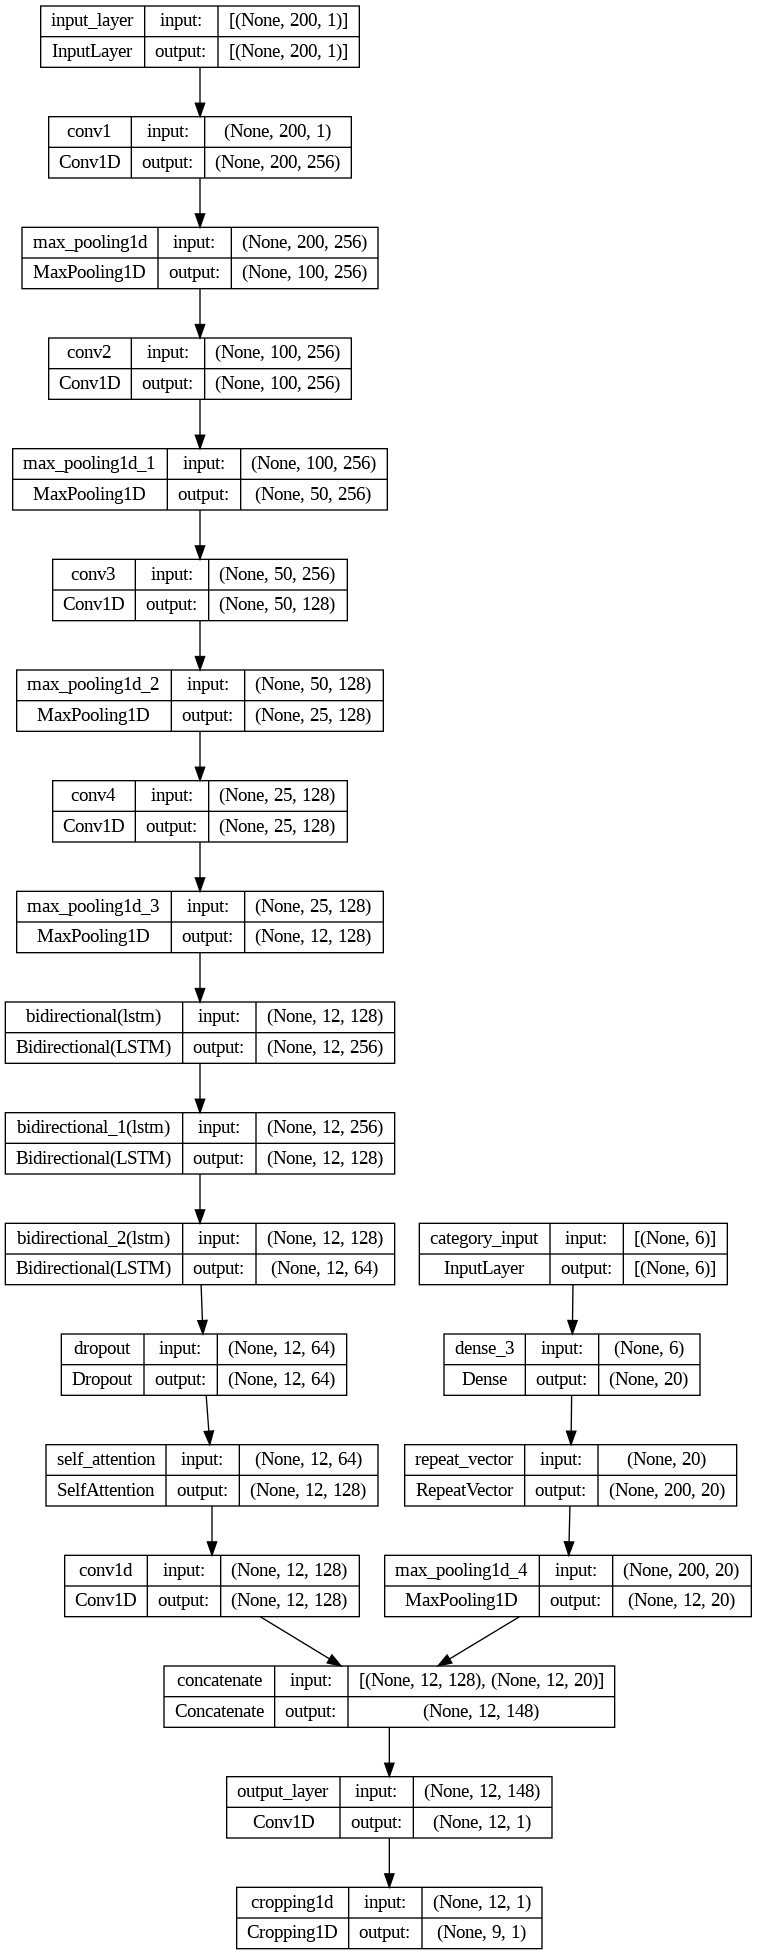

In [30]:
model.summary()

from tensorflow import keras as tfk
tfk.utils.plot_model(model, expand_nested=True, show_shapes=True)

In [32]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    mode='min',
    patience=10,
    restore_best_weights=True
)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    mode='min',
    patience=5,
    factor=0.1,
    min_lr=1e-5
)

history = model.fit(
    x = [X_train, X_train_category],
    y = y_train,
    batch_size = batch_size,
    epochs = epochs,
    validation_data = ([X_val, X_val_category], y_val),
    callbacks = [
        early_stopping,
        reduce_lr
    ]
).history

Epoch 1/200
5691/5691 [==============================] - 180s 28ms/step - loss: 0.0104 - val_loss: 0.0092 - lr: 0.0010
Epoch 2/200
5691/5691 [==============================] - 143s 25ms/step - loss: 0.0082 - val_loss: 0.0077 - lr: 0.0010
Epoch 3/200
5691/5691 [==============================] - 151s 27ms/step - loss: 0.0076 - val_loss: 0.0072 - lr: 0.0010
Epoch 4/200
5691/5691 [==============================] - 143s 25ms/step - loss: 0.0073 - val_loss: 0.0073 - lr: 0.0010
Epoch 5/200
5691/5691 [==============================] - 141s 25ms/step - loss: 0.0070 - val_loss: 0.0069 - lr: 0.0010
Epoch 6/200
5691/5691 [==============================] - 140s 25ms/step - loss: 0.0068 - val_loss: 0.0068 - lr: 0.0010
Epoch 7/200
5691/5691 [==============================] - 142s 25ms/step - loss: 0.0067 - val_loss: 0.0068 - lr: 0.0010
Epoch 8/200
5691/5691 [==============================] - 143s 25ms/step - loss: 0.0065 - val_loss: 0.0069 - lr: 0.0010
Epoch 9/200
5691/5691 [=========================

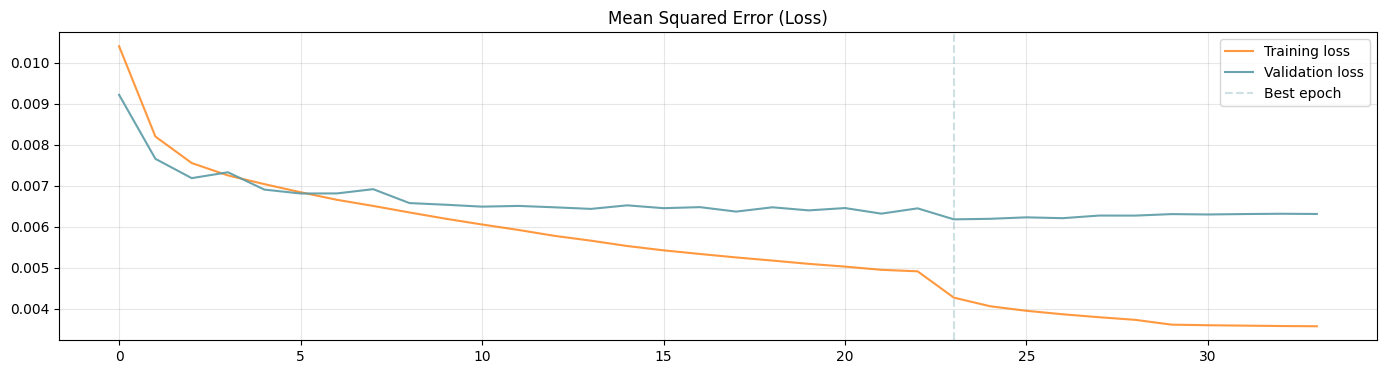

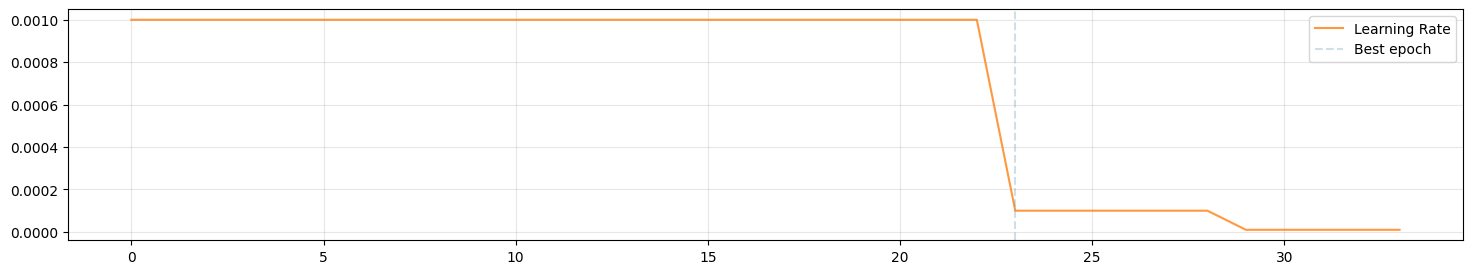

In [34]:
import matplotlib.pyplot as plt
best_epoch = np.argmin(history['val_loss'])
plt.figure(figsize=(17,4))
plt.plot(history['loss'], label='Training loss', alpha=.8, color='#ff7f0e')
plt.plot(history['val_loss'], label='Validation loss', alpha=.9, color='#5a9aa5')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.title('Mean Squared Error (Loss)')
plt.legend()
plt.grid(alpha=.3)
plt.show()

plt.figure(figsize=(18,3))
plt.plot(history['lr'], label='Learning Rate', alpha=.8, color='#ff7f0e')
plt.axvline(x=best_epoch, label='Best epoch', alpha=.3, ls='--', color='#5a9aa5')
plt.legend()
plt.grid(alpha=.3)
plt.show()

In [36]:
preds = model.predict([X_val, X_val_category])

2821/2821 [==============================] - 29s 8ms/step


In [ ]:
preds.shape

(50662, 9, 1)

In [38]:
import tensorflow.keras as tfk
# Predict the test set using the model
predictions = preds

# Print the shape of the predictions
print(f"Predictions shape: {predictions.shape}")

# Calculate and print Mean Squared Error (MSE)
mean_squared_error = tfk.metrics.mean_squared_error(y_val.flatten(), predictions.flatten()).numpy()
print(f"Mean Squared Error: {mean_squared_error}")

# Calculate and print Mean Absolute Error (MAE)
mean_absolute_error = tfk.metrics.mean_absolute_error(y_val.flatten(), predictions.flatten()).numpy()
print(f"Mean Absolute Error: {mean_absolute_error}")

Predictions shape: (90243, 9, 1)
Mean Squared Error: 0.0061807758174836636
Mean Absolute Error: 0.04996514320373535


In [39]:

def plot_with_training(y_train, y_true, y_pred, num_samples=3):
    """Plot the training, true, and predicted values for a random sample of sequences."""
    sample_indices = np.random.choice(np.arange(len(y_true)), num_samples, replace=False)

    for i, index in enumerate(sample_indices, 1):
        plt.figure(figsize=(12, 4))

        # Plot the training part (first 200 points)
        plt.plot(y_train[index].flatten(), label='Training Values', color='blue')

        # Plot the true values (next 18 points)
        true_start_index = len(y_train[index])
        plt.plot(range(true_start_index, true_start_index + len(y_true[index])),
                 y_true[index].flatten(), label='True Values', color='green')

        # Plot the predicted values (next 18 points)
        plt.plot(range(true_start_index, true_start_index + len(y_pred[index])),
                 y_pred[index].flatten(), label='Predicted Values', linestyle='--', color='red')

        plt.title(f'Sequence {i} - Training, True vs Predicted')
        plt.xlabel('Time Steps')
        plt.ylabel('Value')
        plt.legend()
        plt.show()

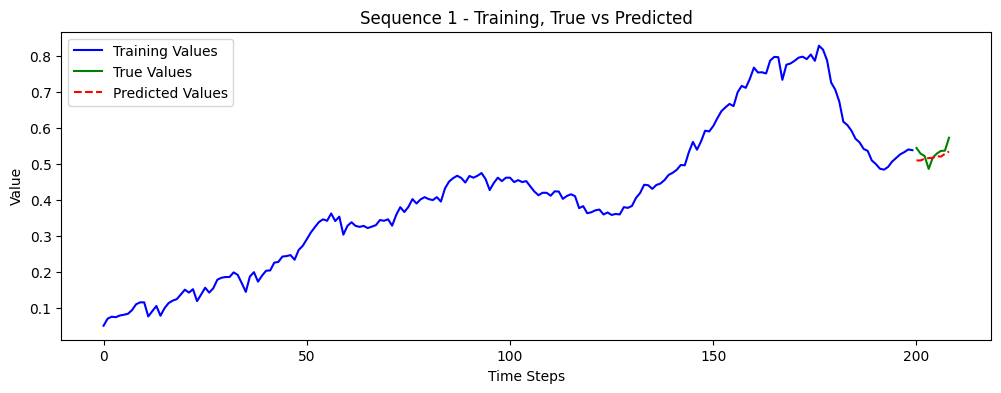

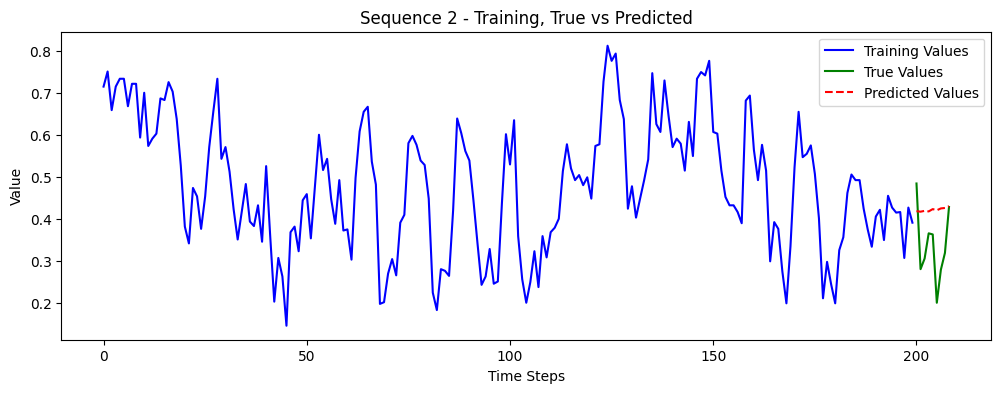

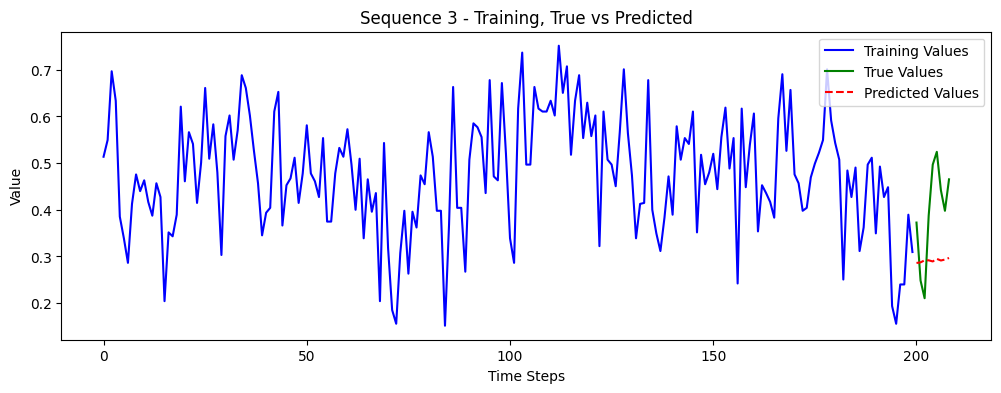

In [ ]:
plot_with_training(X_val, y_val, preds)
